In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train,X_test = X_train/255.0 ,X_test/255.0

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


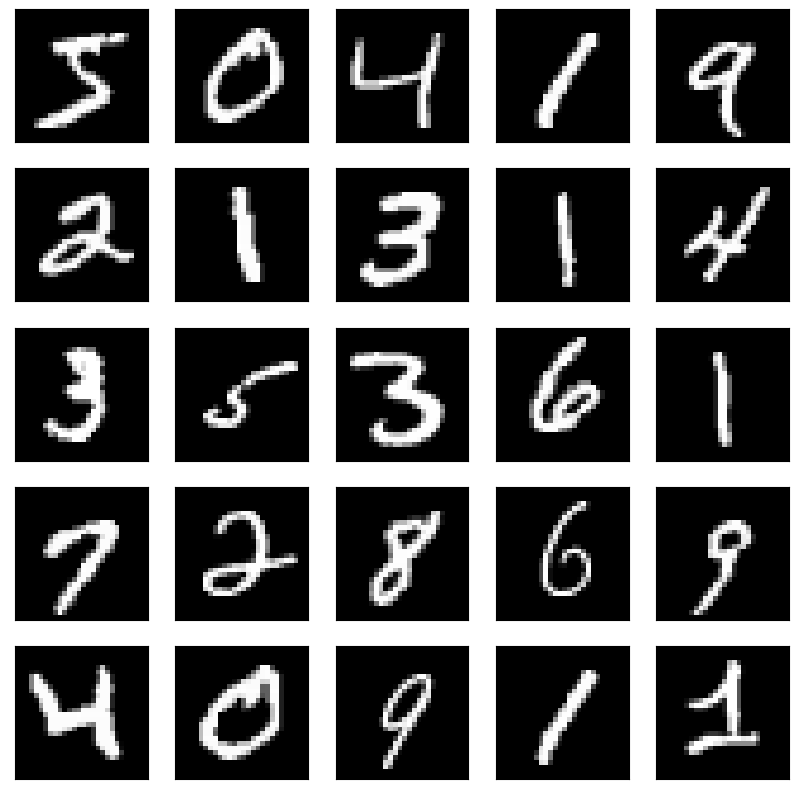

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap='gray')
plt.show()

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [8]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [11]:
model_fit = model.fit(X_train,y_train,validation_split=0.33,epochs=10,batch_size=100,validation_data=(X_test,y_test),callbacks=early_stopping)

Epoch 1/10


600/600 [==============================] - 19s 27ms/step - loss: 0.4198 - accuracy: 0.6975 - val_loss: 0.5237 - val_accuracy: 0.6304
Epoch 2/10
600/600 [==============================] - 16s 27ms/step - loss: 0.4133 - accuracy: 0.7208 - val_loss: 0.1900 - val_accuracy: 0.8617
Epoch 3/10
600/600 [==============================] - 16s 26ms/step - loss: 0.1891 - accuracy: 0.8720 - val_loss: 0.1661 - val_accuracy: 0.8953
Epoch 4/10
600/600 [==============================] - 16s 26ms/step - loss: 0.1817 - accuracy: 0.8790 - val_loss: 0.1749 - val_accuracy: 0.8775
Epoch 5/10
600/600 [==============================] - 15s 26ms/step - loss: 0.1774 - accuracy: 0.8839 - val_loss: 0.1644 - val_accuracy: 0.8916
Epoch 6/10
600/600 [==============================] - 15s 26ms/step - loss: 0.1775 - accuracy: 0.8806 - val_loss: 0.1748 - val_accuracy: 0.8849
Epoch 7/10
600/600 [==============================] - 15s 26ms/step - loss: 0.1768 - accuracy: 0.8834 - val_loss: 0.1617 - val_accurac

In [12]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

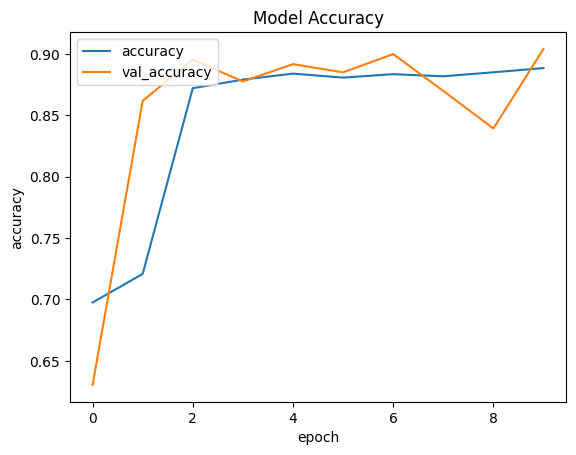

In [13]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc = 'upper left')
plt.show()

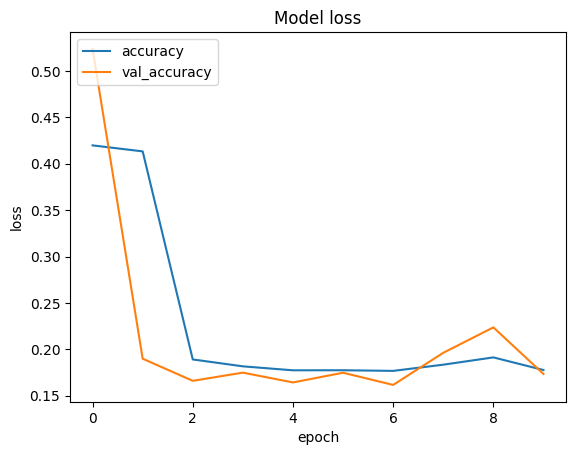

In [14]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['accuracy','val_accuracy'],loc = 'upper left')
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

313/313 [==============================] - 2s 7ms/step


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

conf = confusion_matrix(y_test_labels, y_pred_labels)

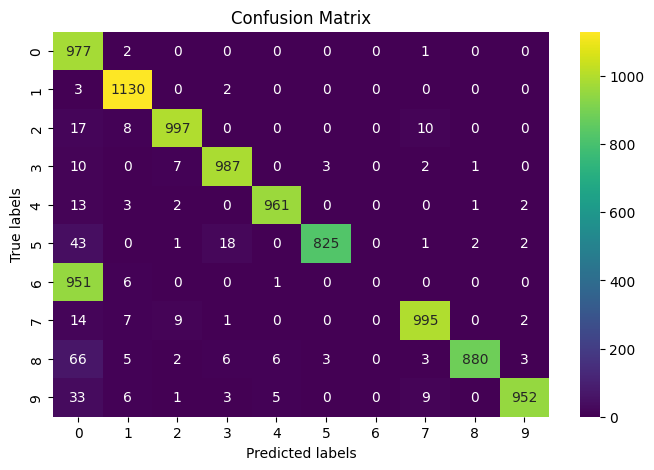

In [17]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(conf,cmap='viridis',annot=True,fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
acc = accuracy_score(y_test_labels,y_pred_labels)
acc

0.8704